In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
#to load the dataset
df=pd.read_csv("/content/sample_data/creditcard.csv")

In [34]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
df.shape

(284807, 31)

In [36]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

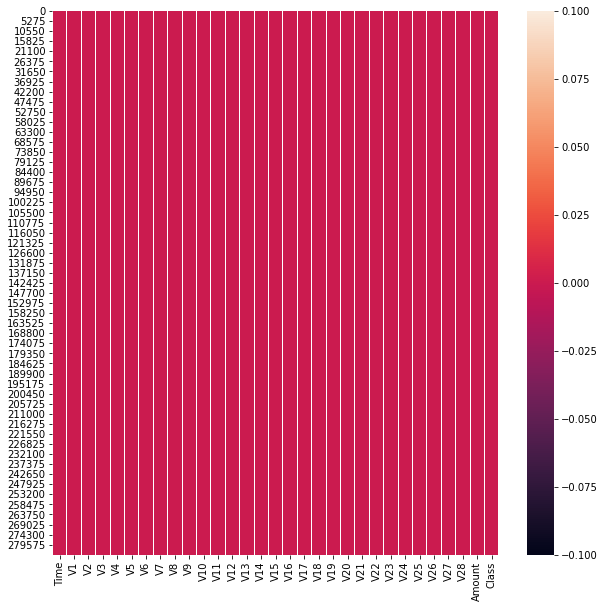

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()
#null found

In [39]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)
# checking which row is null

Empty DataFrame
Columns: [Time, V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, Amount, Class]
Index: []


In [40]:
df.drop(3972,axis=0,inplace=True)#dropping the row

In [41]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

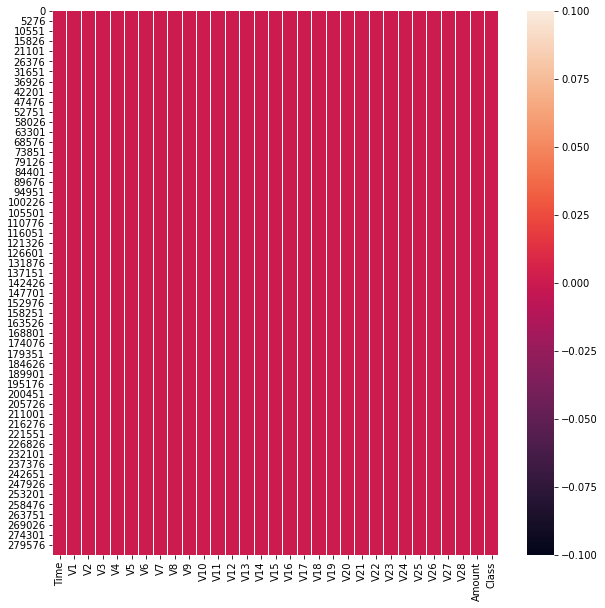

In [42]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())
plt.show()
#no null found

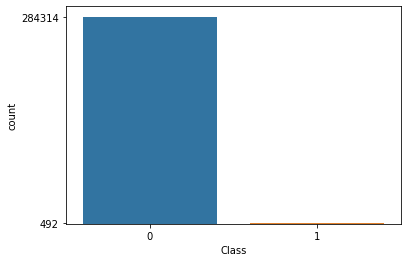

In [43]:
sns.countplot(data=df,x='Class')
c=df["Class"].value_counts()
plt.yticks(c)
plt.show()
# this shows data is not balanced

In [45]:
X=df.drop("Class",axis=1) #input variable
Y=df["Class"] #Target variable

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [48]:
def create_model(model):
    model.fit(X_train,Y_train)#training the model
    y_pred=model.predict(X_test) #testing it
    print(classification_report(Y_test,y_pred))
    print("Confusion Matrix : ")
    print(confusion_matrix(Y_test,y_pred))
    return model

In [49]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
pd.Series(Y_train).value_counts()

0    199008
1       356
Name: Class, dtype: int64

In [50]:
X_sample_train1,Y_sample_train1 = ros.fit_sample(X_train,Y_train)
pd.Series(Y_sample_train1).value_counts()

1    199008
0    199008
dtype: int64

In [51]:
X_sample_test1,Y_sample_test1 = ros.fit_sample(X_test,Y_test)
pd.Series(Y_sample_test1).value_counts()

1    85306
0    85306
dtype: int64

In [52]:
lr=LogisticRegression()
create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.72      0.66      0.69       136

    accuracy                           1.00     85442
   macro avg       0.86      0.83      0.84     85442
weighted avg       1.00      1.00      1.00     85442

Confusion Matrix : 
[[85271    35]
 [   46    90]]


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
# we might have to improve the precision score as well 

In [54]:
dt1=DecisionTreeClassifier()
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.73      0.74      0.73       136

    accuracy                           1.00     85442
   macro avg       0.86      0.87      0.87     85442
weighted avg       1.00      1.00      1.00     85442

Confusion Matrix : 
[[85268    38]
 [   35   101]]


In [55]:
# lets do some pruning

In [56]:
dt2=DecisionTreeClassifier(max_depth=8)
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.90      0.71      0.79       136

    accuracy                           1.00     85442
   macro avg       0.95      0.85      0.89     85442
weighted avg       1.00      1.00      1.00     85442

Confusion Matrix : 
[[85295    11]
 [   40    96]]


In [57]:
#the score improved by a lot 

In [58]:
# lets try boosting 

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
create_model(ada)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.84      0.74      0.79       136

    accuracy                           1.00     85442
   macro avg       0.92      0.87      0.89     85442
weighted avg       1.00      1.00      1.00     85442

Confusion Matrix : 
[[85287    19]
 [   35   101]]


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [61]:
gbc=GradientBoostingClassifier(n_estimators=100)
create_model(gbc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.74      0.54      0.62       136

    accuracy                           1.00     85442
   macro avg       0.87      0.77      0.81     85442
weighted avg       1.00      1.00      1.00     85442

Confusion Matrix : 
[[85281    25]
 [   63    73]]


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
xgb=XGBClassifier(n_estimators=100,reg_alpha=1)
create_model(xgb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.95      0.76      0.84       136

    accuracy                           1.00     85442
   macro avg       0.98      0.88      0.92     85442
weighted avg       1.00      1.00      1.00     85442

Confusion Matrix : 
[[85301     5]
 [   33   103]]


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [63]:
# finally lets try random forest

In [65]:
rfc=RandomForestClassifier(n_estimators=10,max_features=10,random_state=1)
create_model(rfc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.95      0.76      0.84       136

    accuracy                           1.00     85442
   macro avg       0.98      0.88      0.92     85442
weighted avg       1.00      1.00      1.00     85442

Confusion Matrix : 
[[85301     5]
 [   33   103]]


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [ ]:
# Finally we can conclude using random forest gave better results than the others with good recall and precision score.
# WE can conclude to use Random FOrest Algo in this case.